In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

import requests
from bs4 import BeautifulSoup

import os
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import FinanceDataReader as fdr

In [4]:
# KT&G 주가 2005~Now
# 4263 rows

ktng = fdr.DataReader('033780', '2005-01-01', '2022-03-30')
ktng.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2005-01-03,31000,31150,30650,30650,259867,-0.009693
2005-01-04,30850,31250,30650,31000,321100,0.011419
2005-01-05,31000,31650,30900,31500,635585,0.016129
2005-01-06,31850,31900,31000,31000,420824,-0.015873
2005-01-07,31150,31500,31000,31200,296535,0.006452


<AxesSubplot:xlabel='Date'>

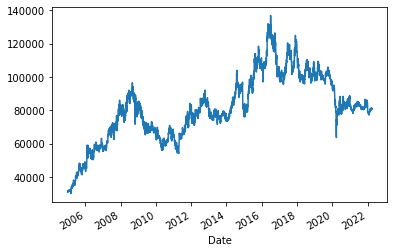

In [5]:
ktg = fdr.DataReader('033780', '2005')
ktg['Close'].plot()

In [19]:
ktg['mo'] = [str(d)[5:7] for d in ktg.index]

In [22]:
def qtm(x):
    if 1 <= int(x) <= 3:
        return '01'
    elif 4 <= int(x) <= 6:
        return '02'
    elif 7 <= int(x) <= 9:
        return '03'
    else:
        return '04'

In [24]:
ktg['qu'] = ktg.mo.apply(qtm)

In [26]:
ktg.head(50)

,Open,High,Low,Close,Volume,Change,qu,mo
Date,,,,,,,,
2005-01-03,31000,31150,30650,30650,259867,-0.009693,01,01
2005-01-04,30850,31250,30650,31000,321100,0.011419,01,01
2005-01-05,31000,31650,30900,31500,635585,0.016129,01,01
2005-01-06,31850,31900,31000,31000,420824,-0.015873,01,01
2005-01-07,31150,31500,31000,31200,296535,0.006452,01,01
2005-01-10,31200,31550,31050,31450,238419,0.008013,01,01
2005-01-11,31450,31450,30950,31300,467384,-0.004769,01,01
2005-01-12,31500,31600,31150,31500,479699,0.006390,01,01
2005-01-13,31500,31500,31100,31500,476459,0.000000,01,01


In [7]:
df = pd.read_excel("./ktg.xlsx")
df

,Unnamed: 0,매출액,영업이익,영업이익률
0,20051,3964,968,24.4
1,20052,5324,1683,31.6
2,20053,6315,2198,34.8
3,20054,6491,1920,29.6
4,20061,4406,1151,26.1
...,...,...,...,...
63,20204,13410,3367,25.1
64,20211,12639,3177,25.1
65,20212,13465,3301,24.5
66,20213,15684,4239,27.0


In [8]:
df.columns = ['Date','매출액', '영업이익', '영업이익률']

In [9]:
df

,Date,매출액,영업이익,영업이익률
0,20051,3964,968,24.4
1,20052,5324,1683,31.6
2,20053,6315,2198,34.8
3,20054,6491,1920,29.6
4,20061,4406,1151,26.1
...,...,...,...,...
63,20204,13410,3367,25.1
64,20211,12639,3177,25.1
65,20212,13465,3301,24.5
66,20213,15684,4239,27.0


In [15]:
df.Date

0     20051
1     20052
2     20053
3     20054
4     20061
      ...  
63    20204
64    20211
65    20212
66    20213
67    20214
Name: Date, Length: 68, dtype: int64

In [9]:
df1 = df[0:1]
df1

,Date,매출액,영업이익,영업이익률
0,20051,3964,968,24.4


In [10]:
ktng1 = ktng[0:60]
ktng1

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2005-01-03,31000,31150,30650,30650,259867,-0.009693
2005-01-04,30850,31250,30650,31000,321100,0.011419
2005-01-05,31000,31650,30900,31500,635585,0.016129
2005-01-06,31850,31900,31000,31000,420824,-0.015873
2005-01-07,31150,31500,31000,31200,296535,0.006452
2005-01-10,31200,31550,31050,31450,238419,0.008013
2005-01-11,31450,31450,30950,31300,467384,-0.004769
2005-01-12,31500,31600,31150,31500,479699,0.006390
2005-01-13,31500,31500,31100,31500,476459,0.000000


In [11]:
ktng1 = pd.concat([ktng1,df1], axis=1)
ktng1

,Open,High,Low,Close,Volume,Change,Date,매출액,영업이익,영업이익률
1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03,31000.0,31150.0,30650.0,30650.0,259867.0,-0.009693,NaN,NaN,NaN,NaN
2005-01-04,30850.0,31250.0,30650.0,31000.0,321100.0,0.011419,NaN,NaN,NaN,NaN
2005-01-05,31000.0,31650.0,30900.0,31500.0,635585.0,0.016129,NaN,NaN,NaN,NaN
2005-01-06,31850.0,31900.0,31000.0,31000.0,420824.0,-0.015873,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2005-03-25,33000.0,33500.0,32400.0,33000.0,99387.0,0.001517,NaN,NaN,NaN,NaN
2005-03-28,32800.0,33900.0,32800.0,33500.0,145235.0,0.015152,NaN,NaN,NaN,NaN
2005-03-29,33600.0,34100.0,33000.0,33250.0,296624.0,-0.007463,NaN,NaN,NaN,NaN
2005-03-30,32300.0,33400.0,32250.0,33000.0,340366.0,-0.007519,NaN,NaN,NaN,NaN


In [12]:
ktng1['매출액'] = 3964
ktng1['영업이익'] = 968
ktng1['영업이익률'] = 24.4

ktng1 = ktng1[1:60]
ktng1

,Open,High,Low,Close,Volume,Change,Date,매출액,영업이익,영업이익률
2005-01-03,31000.0,31150.0,30650.0,30650.0,259867.0,-0.009693,NaN,3964,968,24.4
2005-01-04,30850.0,31250.0,30650.0,31000.0,321100.0,0.011419,NaN,3964,968,24.4
2005-01-05,31000.0,31650.0,30900.0,31500.0,635585.0,0.016129,NaN,3964,968,24.4
2005-01-06,31850.0,31900.0,31000.0,31000.0,420824.0,-0.015873,NaN,3964,968,24.4
2005-01-07,31150.0,31500.0,31000.0,31200.0,296535.0,0.006452,NaN,3964,968,24.4
2005-01-10,31200.0,31550.0,31050.0,31450.0,238419.0,0.008013,NaN,3964,968,24.4
2005-01-11,31450.0,31450.0,30950.0,31300.0,467384.0,-0.004769,NaN,3964,968,24.4
2005-01-12,31500.0,31600.0,31150.0,31500.0,479699.0,0.006390,NaN,3964,968,24.4
2005-01-13,31500.0,31500.0,31100.0,31500.0,476459.0,0.000000,NaN,3964,968,24.4
2005-01-14,31500.0,31900.0,30950.0,31200.0,631988.0,-0.009524,NaN,3964,968,24.4


In [17]:
ktng1

,Open,High,Low,Close,Volume,Change,Date,매출액,영업이익,영업이익률
2005-01-04,30850.0,31250.0,30650.0,31000.0,321100.0,0.011419,NaN,3964,968,24.4
2005-01-05,31000.0,31650.0,30900.0,31500.0,635585.0,0.016129,NaN,3964,968,24.4
2005-01-06,31850.0,31900.0,31000.0,31000.0,420824.0,-0.015873,NaN,3964,968,24.4
2005-01-07,31150.0,31500.0,31000.0,31200.0,296535.0,0.006452,NaN,3964,968,24.4
2005-01-10,31200.0,31550.0,31050.0,31450.0,238419.0,0.008013,NaN,3964,968,24.4
2005-01-11,31450.0,31450.0,30950.0,31300.0,467384.0,-0.004769,NaN,3964,968,24.4
2005-01-12,31500.0,31600.0,31150.0,31500.0,479699.0,0.006390,NaN,3964,968,24.4
2005-01-13,31500.0,31500.0,31100.0,31500.0,476459.0,0.000000,NaN,3964,968,24.4
2005-01-14,31500.0,31900.0,30950.0,31200.0,631988.0,-0.009524,NaN,3964,968,24.4
2005-01-17,31200.0,31400.0,31100.0,31300.0,511410.0,0.003205,NaN,3964,968,24.4


In [17]:
ktng1.drop('Date', axis=1)

,Open,High,Low,Close,Volume,Change,매출액,영업이익,영업이익률
2005-01-03,31000.0,31150.0,30650.0,30650.0,259867.0,-0.009693,3964,968,24.4
2005-01-04,30850.0,31250.0,30650.0,31000.0,321100.0,0.011419,3964,968,24.4
2005-01-05,31000.0,31650.0,30900.0,31500.0,635585.0,0.016129,3964,968,24.4
2005-01-06,31850.0,31900.0,31000.0,31000.0,420824.0,-0.015873,3964,968,24.4
2005-01-07,31150.0,31500.0,31000.0,31200.0,296535.0,0.006452,3964,968,24.4
2005-01-10,31200.0,31550.0,31050.0,31450.0,238419.0,0.008013,3964,968,24.4
2005-01-11,31450.0,31450.0,30950.0,31300.0,467384.0,-0.004769,3964,968,24.4
2005-01-12,31500.0,31600.0,31150.0,31500.0,479699.0,0.006390,3964,968,24.4
2005-01-13,31500.0,31500.0,31100.0,31500.0,476459.0,0.000000,3964,968,24.4
2005-01-14,31500.0,31900.0,30950.0,31200.0,631988.0,-0.009524,3964,968,24.4


In [19]:
df

,Date,매출액,영업이익,영업이익률
0,20051,3964,968,24.4
1,20052,5324,1683,31.6
2,20053,6315,2198,34.8
3,20054,6491,1920,29.6
4,20061,4406,1151,26.1
...,...,...,...,...
63,20204,13410,3367,25.1
64,20211,12639,3177,25.1
65,20212,13465,3301,24.5
66,20213,15684,4239,27.0


In [18]:
ktng2 = ktng[60:122]

In [ ]:
ktng1['매출액'] = 5324
ktng1['영업이익'] = 1683
ktng1['영업이익률'] = 24.4

ktng1 = ktng1[1:60]
ktng1

In [56]:
ktng[122:186]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2005-07-01,40500,41300,40100,41000,420139,0.012346
2005-07-04,41000,41100,40800,40900,371639,-0.002439
2005-07-05,40950,41100,40300,41000,242270,0.002445
2005-07-06,41200,42300,41000,42000,421189,0.024390
2005-07-07,41500,43200,41500,42650,472438,0.015476
...,...,...,...,...,...,...
2005-09-26,45350,45700,45000,45200,436633,-0.010941
2005-09-27,45200,45400,44250,44300,516602,-0.019912
2005-09-28,44250,45100,44200,45100,575204,0.018059


In [62]:
ktng[186:249]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2005-10-04,45500,45550,45200,45550,486111,0.007743
2005-10-05,45200,45600,43600,44000,914468,-0.034029
2005-10-06,43100,43900,42550,42950,686508,-0.023864
2005-10-07,43000,43500,42300,43000,528542,0.001164
2005-10-10,43000,44400,42950,43950,4329557,0.022093
...,...,...,...,...,...,...
2005-12-23,47700,48650,47400,48500,607899,0.027542
2005-12-26,48750,50600,48350,49000,802908,0.010309
2005-12-27,49500,49500,48400,48650,340278,-0.007143


In [41]:
df.Date = pd.to_datetime(df.Date)
start_date = pd.to_datetime('2005-01-03')
end_date = pd.to_datetime('2022-03-30')
df.Date = pd.date_range(start_date,end_date,freq='D')

ValueError: Length of values (6296) does not match length of index (68)

In [13]:
start_date = pd.to_datetime('2005-01-03')
end_date = pd.to_datetime('2022-03-30')

In [14]:
df = pd.date_range(start_date,end_date,freq='D') ## 일단위로 생성

In [29]:
df

0    1970-01-01 00:00:00.000020051
1    1970-01-01 00:00:00.000020052
2    1970-01-01 00:00:00.000020053
3    1970-01-01 00:00:00.000020054
4    1970-01-01 00:00:00.000020061
                  ...             
63   1970-01-01 00:00:00.000020204
64   1970-01-01 00:00:00.000020211
65   1970-01-01 00:00:00.000020212
66   1970-01-01 00:00:00.000020213
67   1970-01-01 00:00:00.000020214
Name: Date, Length: 68, dtype: datetime64[ns]

In [17]:
df = pd.DataFrame(df, columns=['Date'])

In [18]:
df

,Date
0,2005-01-03
1,2005-01-04
2,2005-01-05
3,2005-01-06
4,2005-01-07
...,...
6291,2022-03-26
6292,2022-03-27
6293,2022-03-28
6294,2022-03-29


In [19]:
merge_date = pd.merge(df, ktg, how='left', on='Date')

In [20]:
merge_date

,Date,Open,High,Low,Close,Volume,Change
0,2005-01-03,31000.0,31150.0,30650.0,30650.0,259867.0,-0.009693
1,2005-01-04,30850.0,31250.0,30650.0,31000.0,321100.0,0.011419
2,2005-01-05,31000.0,31650.0,30900.0,31500.0,635585.0,0.016129
3,2005-01-06,31850.0,31900.0,31000.0,31000.0,420824.0,-0.015873
4,2005-01-07,31150.0,31500.0,31000.0,31200.0,296535.0,0.006452
...,...,...,...,...,...,...,...
6291,2022-03-26,NaN,NaN,NaN,NaN,NaN,NaN
6292,2022-03-27,NaN,NaN,NaN,NaN,NaN,NaN
6293,2022-03-28,80200.0,80900.0,80100.0,80800.0,170834.0,0.000000
6294,2022-03-29,81000.0,81100.0,80500.0,81100.0,157378.0,0.003713


In [50]:
dates = pd.date_range(start_date,end_date,freq='D') ## 일단위로 생성
dates = pd.DataFrame(dates, columns=['date'])
merge_date = pd.merge(dates, ktg, how='left', on='date')

## 보간법
col = merge_fn_statement1_date.columns.values
for c in col[1:]:
    merge_fn_statement1_date.loc[:,c] = merge_fn_statement1_date.loc[:,c].interpolate()

KeyError: 'date'

In [ ]:
# # 날짜 dataframe 만들기
# start_date = pd.to_datetime('2015-01-01') ## 시작 날짜
# end_date = pd.to_datetime('2022-03-07') ## 마지막 날짜
 
# dates = pd.date_range(start_date,end_date,freq='M') ## 월단위로 생성
# dates = pd.DataFrame(dates, columns=['date'])

In [11]:
url = 'https://www.ktng.com/financial?cmsCd=CM0012&categCd=&ntNo=0&year=2005'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
html = res.text

In [12]:
soup


<!DOCTYPE html>

<!--[if lt IE 7]> <html lang="ko" class="ie6"> <![endif]-->
<!--[if IE 7]>    <html lang="ko" class="ie7"> <![endif]-->
<!--[if IE 8]>    <html lang="ko" class="ie8"> <![endif]-->
<!--[if IE 9]>    <html lang="ko" class="ie9"> <![endif]-->
<!--[if gt IE 9]><!--><html lang="ko"><!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,maximum-scale=1.0, minimum-scale=1.0,user-scalable=no" id="viewport" name="viewport">
<meta content="telephone=no" name="format-detection"/>
<meta content="KL-BV9BPtAF01iPyQRFbB3eidwWucIaab6Sa-DxG84Q" name="google-site-verification">
<meta content="KT&amp;G 주요 경영실적 및 재무지표를 제공합니다." name="title">
<meta content="KT&amp;G 경영정보, 주주구성, 이사회, 재무정보, 재무제표, 감사보고서, 주가정보, 주식, 공시정보, IR자료실, 실적발표자료, 사업보고서, 연차보고서, 결산공고" name="keywords"/>
<meta content="KT&amp;G는 이사회의 의사결정과 최고경영자의 책임하에 관리자 및 구성원에 의해 사업을 수행하며 투명한 경영을 목표로 합니다." name="description"/>
<meta charset=

In [13]:
html

'\r\n\r\n\r\n<!doctype html>\r\n<!--[if lt IE 7]> <html lang="ko" class="ie6"> <![endif]-->\r\n<!--[if IE 7]>    <html lang="ko" class="ie7"> <![endif]-->\r\n<!--[if IE 8]>    <html lang="ko" class="ie8"> <![endif]-->\r\n<!--[if IE 9]>    <html lang="ko" class="ie9"> <![endif]-->\r\n<!--[if gt IE 9]><!--><html lang="ko"><!--<![endif]-->\r\n<head>\r\n\t<meta charset="utf-8">\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge">\r\n\t<meta name="viewport" id="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=1.0, minimum-scale=1.0,user-scalable=no" />\r\n\t<meta name="format-detection" content="telephone=no">\r\n\t\r\n\r\n\r\n\r\n\t<meta name="google-site-verification" content="KL-BV9BPtAF01iPyQRFbB3eidwWucIaab6Sa-DxG84Q" />\r\n\r\n\t<meta name="title" content="KT&G 주요 경영실적 및 재무지표를 제공합니다." />\r\n\t<meta name="keywords" content="KT&G 경영정보, 주주구성, 이사회, 재무정보, 재무제표, 감사보고서, 주가정보, 주식, 공시정보, IR자료실, 실적발표자료, 사업보고서, 연차보고서, 결산공고" />\r\n\t<meta name="description" content="KT&

매출액

영업이익 : 영업활동을 통하여 획득한 이익(손실), 전체 매출액에서 제조에 들어가는 매출원가와 영업활동에 들어가는 비용인 판관비를 제외하고 남은 수익

영업이익률 : 제조 단계에서 원가가 높거나 판매 단계에서 효율적이지 못하면 영업이익률이 떨어지게 된다
= 영업이익/매출액 x 100 : 

In [47]:
scaler = MinMaxScaler()
price = scaler.fit_transform(lg)
price[:3]

array([[0.00363387, 0.00397558, 0.00380601, 0.00423365, 0.29341773,
        0.54584803],
       [0.00397722, 0.00604856, 0.00397901, 0.00635048, 0.8432324 ,
        0.91485785],
       [0.00649518, 0.00766719, 0.00668935, 0.0079524 , 0.63066951,
        0.76999909]])

In [48]:
window_size = 10
X = []
Y = []

for i in range(len(price) - window_size):
  X.append([price[i+j] for j in range(window_size)])
  Y.append(price[window_size + i][0])

In [49]:
X = np.array(X)
Y = np.array(Y)

In [50]:
X.shape

(4992, 10, 6)

In [51]:
Y.shape

(4992,)

In [54]:
tt_split = 4000

x_train = X[:tt_split]
y_train = Y[:tt_split]

x_test = X[tt_split:]
y_test = Y[tt_split:]

In [55]:
x_train.shape

(4000, 10, 6)

In [57]:
model = Sequential()
model.add(LSTM(100, input_shape=(10, 6)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='mse', optimizer='adam')

In [59]:
model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/20
400/400 [==============================] - 2s 3ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 2/20
400/400 [==============================] - 1s 3ms/step - loss: 4.7674e-04 - val_loss: 5.3091e-04
Epoch 3/20
400/400 [==============================] - 1s 3ms/step - loss: 3.5763e-04 - val_loss: 3.2891e-04
Epoch 4/20
400/400 [==============================] - 1s 3ms/step - loss: 3.2571e-04 - val_loss: 5.6941e-04
Epoch 5/20
400/400 [==============================] - 1s 3ms/step - loss: 2.8381e-04 - val_loss: 0.0012
Epoch 6/20
400/400 [==============================] - 1s 3ms/step - loss: 2.4536e-04 - val_loss: 2.1251e-04
Epoch 7/20
400/400 [==============================] - 1s 3ms/step - loss: 2.2423e-04 - val_loss: 1.8693e-04
Epoch 8/20
400/400 [==============================] - 1s 3ms/step - loss: 2.3007e-04 - val_loss: 2.7237e-04
Epoch 9/20
400/400 [==============================] - 1s 3ms/step - loss: 2.2223e-04 - val_loss: 1.7675e-04
Epoch 10/20
400/400 [===================

In [60]:
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

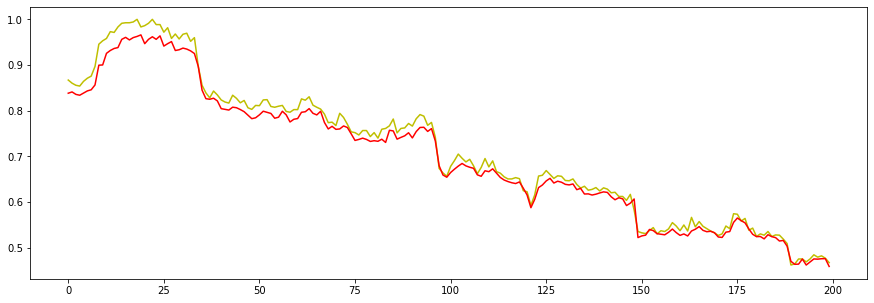

In [61]:
plt.figure(figsize=(15,5))

plt.plot(price[-200:,0], color='y')
plt.plot(x_test_pred[-200:], color='r')

In [ ]:
ele_car_merge = pd.merge(ele_car_merge, df_batt, how='outer', on='date')

In [ ]:
# kt&g

url = 'https://www.ktng.com/financial?cmsCd=CM0012&categCd=&ntNo=0&year=2005'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
datas = soup.select('table.tableRanking')

url = 'https://movie.naver.com/movie/point/af/list.naver?&page={}'
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')
path = '#old_content'
movie = soup.select(path)
movie

In [35]:
url = 'http://consensus.hankyung.com/apps.analysis/analysis.downpdf?report_idx=606984'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
html = res.text

In [36]:
soup

In [37]:
html

''

In [ ]:
# 재무제표1 보간법
### 날짜 dataframe 만들기
start_date = pd.to_datetime('2015-01-01') ## 시작 날짜
end_date = pd.to_datetime('2022-03-07') ## 마지막 날짜
 
dates = pd.date_range(start_date,end_date,freq='D') ## 일단위로 생성
dates = pd.DataFrame(dates, columns=['date'])
merge_fn_statement1_date = pd.merge(dates, df_fn_statements, how='left', on='date')
## 보간법
col = merge_fn_statement1_date.columns.values
for c in col[1:]:
    merge_fn_statement1_date.loc[:,c] = merge_fn_statement1_date.loc[:,c].interpolate()